In [2]:
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import warnings

In [4]:
base_dir = "dataset8"
train_path = os.path.join(base_dir, "train")
test_path = os.path.join(base_dir, "validation")

In [5]:
model = Sequential()
model.add(Conv2D(128, (3, 3), activation="relu", input_shape=(150, 150, 3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3, 3), activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3, 3), activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(5000, activation="relu"))
model.add(Dense(1000, activation="relu"))
model.add(Dense(4, activation="softmax"))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 32)        0

In [7]:
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(lr=0.0001),
    metrics=["accuracy"],
)

In [8]:
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    shear_range=0.3,
    zoom_range=0.3,
    horizontal_flip=True,
    vertical_flip=False,
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255)

In [9]:
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(150, 150),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)

test_generator = test_datagen.flow_from_directory(
    test_path,
    target_size=(150, 150),
    batch_size=batch_size,
    color_mode="rgb",
    class_mode="categorical",
)

Found 1797 images belonging to 4 classes.
Found 745 images belonging to 4 classes.


In [10]:
total_train_samples = len(train_generator.filenames)
total_validation_samples = len(test_generator.filenames)

In [38]:
history = model.fit(
    train_generator,
    steps_per_epoch=total_train_samples // batch_size,
    epochs=20,
    validation_data=test_generator,
    validation_steps=total_validation_samples // batch_size,
)

Epoch 1/20
56/56 [==============================] - 156s 3s/step - loss: 0.8475 - accuracy: 0.6266 - val_loss: 0.3744 - val_accuracy: 0.8641
Epoch 2/20
56/56 [==============================] - 153s 3s/step - loss: 0.4137 - accuracy: 0.8210 - val_loss: 0.2084 - val_accuracy: 0.8899
Epoch 3/20
56/56 [==============================] - 154s 3s/step - loss: 0.2597 - accuracy: 0.8935 - val_loss: 0.1686 - val_accuracy: 0.9212
Epoch 4/20
56/56 [==============================] - 158s 3s/step - loss: 0.2179 - accuracy: 0.9201 - val_loss: 0.2476 - val_accuracy: 0.8872
Epoch 5/20
56/56 [==============================] - 165s 3s/step - loss: 0.1902 - accuracy: 0.9263 - val_loss: 0.0928 - val_accuracy: 0.9633
Epoch 6/20
56/56 [==============================] - 157s 3s/step - loss: 0.1146 - accuracy: 0.9558 - val_loss: 0.0643 - val_accuracy: 0.9810
Epoch 7/20
56/56 [==============================] - 153s 3s/step - loss: 0.1391 - accuracy: 0.9428 - val_loss: 0.0712 - val_accuracy: 0.9701
Epoch 8/20
56

In [20]:
model.save("model11.h5")

c:\Users\Ilham\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [31]:
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

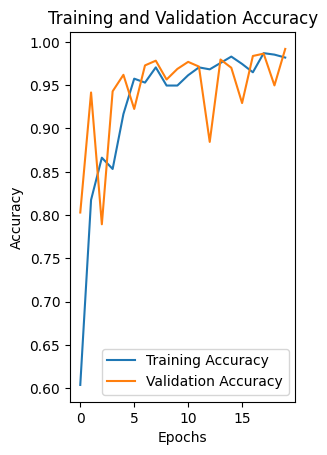

In [32]:
# Plot akurasi pelatihan dan validasi
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

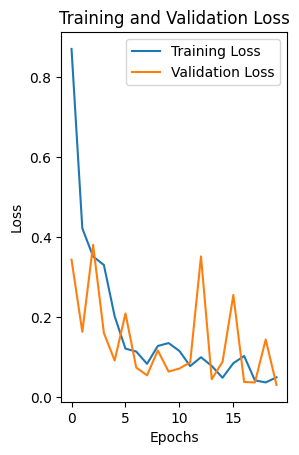

In [33]:
# Plot loss pelatihan dan validasi
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

1/1 [==============================] - 0s 407ms/step


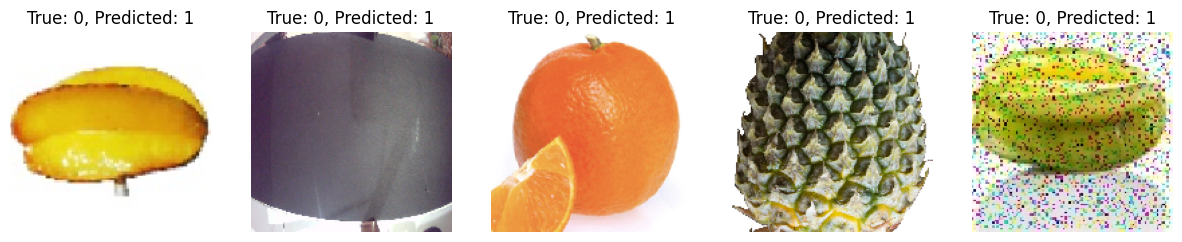

In [37]:
# Menampilkan beberapa sampel hasil pengujian
num_samples = 5
test_images, test_labels = next(test_generator)

# Prediksi kelas
predicted_classes = model.predict(test_images)
predicted_classes = np.argmax(predicted_classes, axis=1)

# Menampilkan sampel hasil pengujian
plt.figure(figsize=(15, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(test_images[i])
    plt.title(f'True: {test_generator.classes[i]}, Predicted: {predicted_classes[i]}')
    plt.axis('off')

plt.show()

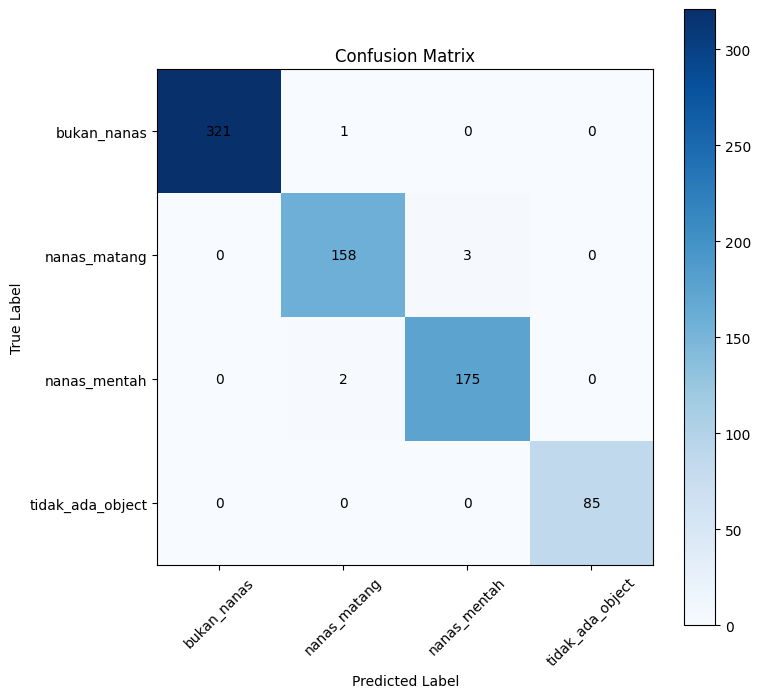

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       322
           1       0.98      0.98      0.98       161
           2       0.98      0.99      0.99       177
           3       1.00      1.00      1.00        85

    accuracy                           0.99       745
   macro avg       0.99      0.99      0.99       745
weighted avg       0.99      0.99      0.99       745



In [44]:
# Menampilkan confusion matrix dengan nilai di setiap sel
plt.figure(figsize=(6, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
classes = list(test_generator.class_indices.keys())
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Menambahkan nilai di setiap sel
for i in range(len(classes)):
    for j in range(len(classes)):
        plt.text(j, i, str(cm[i, j]), horizontalalignment='center', verticalalignment='center')

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Menampilkan classification report
print("Classification Report:\n", classification_report(all_true_classes, all_predicted_classes))
